### Classificatipon sur les données du diabète

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from daal4py.sklearn.svm.svm import predict_proba

#Importation du package
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from pycaret.regression import *

In [3]:
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Type des variables
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 1. Les doublons

In [7]:
# Nombre de ligne dupliquées
len(data[data.duplicated()])

0

In [8]:
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


On constate que nous n'avons pas de doublons dans nos données.

## 2. Les valeurs manquantes

In [9]:
# nombre de valeurs manquantes
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Nous n'avons pas de valeurs manquantes

In [10]:
# Statistique descriptives
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Les Outliers

#### Traitement des outliers et remplacement

In [11]:
# calcul des bornes
def limit_outlier(data,col):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lower = data[col].quantile(0.25) - 1.5 *  IQR
    upper = data[col].quantile(0.75) + 1.5 *  IQR
    return lower, upper

<Axes: xlabel='Pregnancies'>

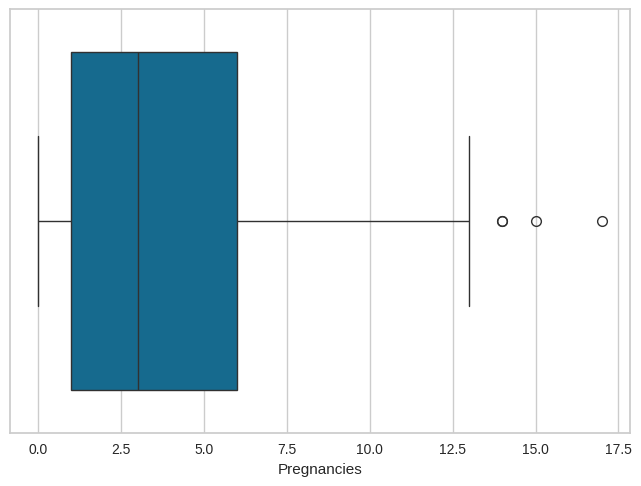

In [12]:
# Pregnancies: data['Pregnancies'].mean() + 3*data['Pregnancies'].std 
sns.boxplot(x = 'Pregnancies',data=data)

On a des valeurs abérentes on va les remplacer par Q3 + 1.5*IQR

In [13]:
# Calcul des bornes
lower, upper = limit_outlier(data,'Pregnancies')
# remplacement
data.loc[data['Pregnancies'] > upper,'Pregnancies' ] = upper
data[data['Pregnancies'] > upper ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: xlabel='Glucose'>

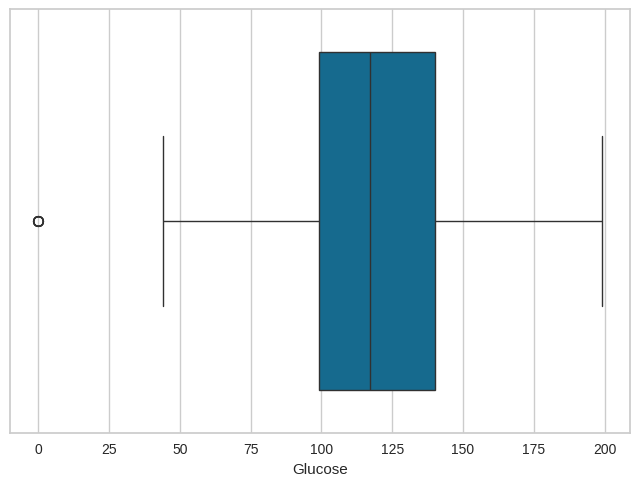

In [14]:
# Glucose: data['Glucose'].mean() + 3*data['Glucose'].std 
sns.boxplot(x = 'Glucose',data=data)

On a les valeurs abérentes, on va les remplacer par Q1 - 1.5*IQR

In [15]:
# Calcul de la borne supérieure
lower_gl, upper_gl = limit_outlier(data,'Glucose')
# remplacement
data.loc[data['Glucose'] < lower_gl, 'Glucose' ] = lower_gl
data[data['Glucose'] < lower_gl ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: xlabel='BloodPressure'>

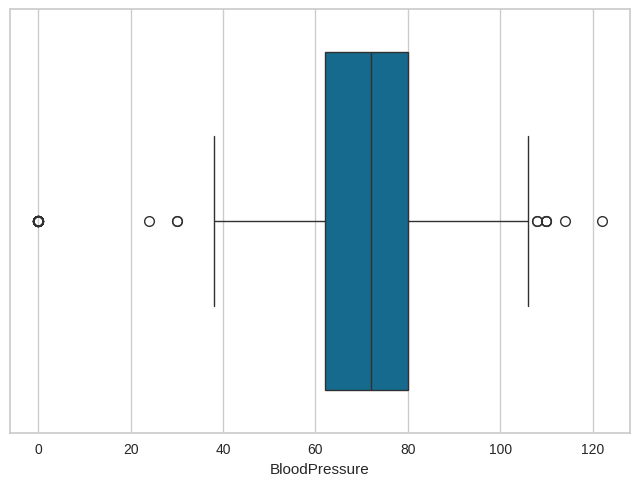

In [16]:
# Glucose: data['BloodPressure'].mean() + 3*data['BloodPressure'].std 
sns.boxplot(x = 'BloodPressure',data=data)

On a les valeurs abérentes des deux cotés, on va les remplacer par Q1-1.5*IQR et Q3+1.5*IQR

In [17]:
# Calcul de la borne supérieure
lower_bp, upper_bp = limit_outlier(data,'BloodPressure')
# remplacement
data.loc[data['BloodPressure'] < lower_bp,'BloodPressure' ] = lower_bp
data.loc[data['BloodPressure'] > upper_bp,'BloodPressure' ] = upper_bp
data[(data['BloodPressure'] < lower_bp) & (data['BloodPressure'] > upper_bp)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: xlabel='SkinThickness'>

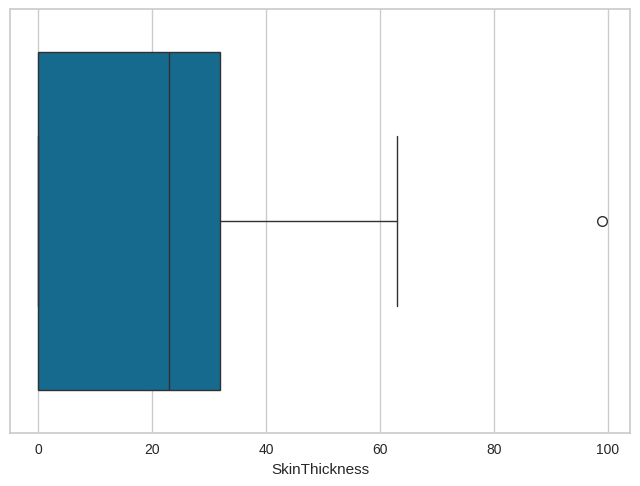

In [18]:
# SkinThickness
sns.boxplot(x='SkinThickness',data=data)

On a des valeurs abérentes on va les remplacer par Q3 + 1.5*IQR

In [19]:
# Calcul de la borne supérieure
lower_sk, upper_sk = limit_outlier(data,'SkinThickness')
# remplacement
data.loc[data['SkinThickness'] > upper_sk,'SkinThickness' ] = upper_sk
data[data['SkinThickness'] > upper_sk]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: xlabel='Insulin'>

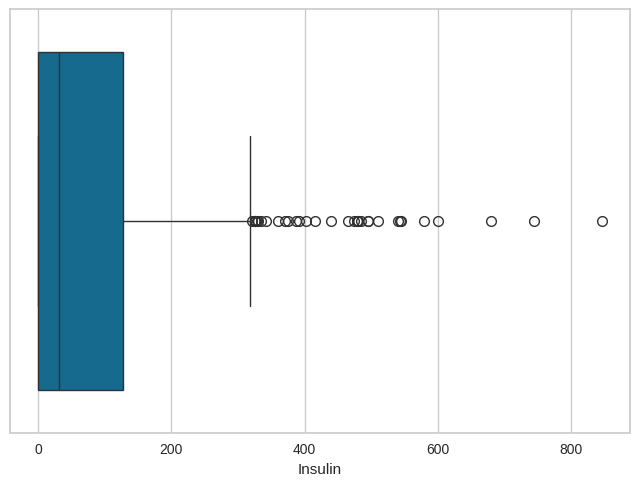

In [20]:
# Insulin
sns.boxplot(x='Insulin',data=data)

On va remplacer les valeurs abérentes par Q3+1.5*IQR

In [21]:
#calcul de la valeurs limites de valeurs abérentes
max = data['Insulin'].mean() + 3*data['Insulin'].std()
max

425.5314862206812

In [22]:
# Calcul de la borne supérieure
lower_in, upper_in = limit_outlier(data,'Insulin')
# remplacement
data.loc[data['Insulin'] > max, 'Insulin' ] = upper_in
data[data['Insulin'] > max]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: xlabel='BMI'>

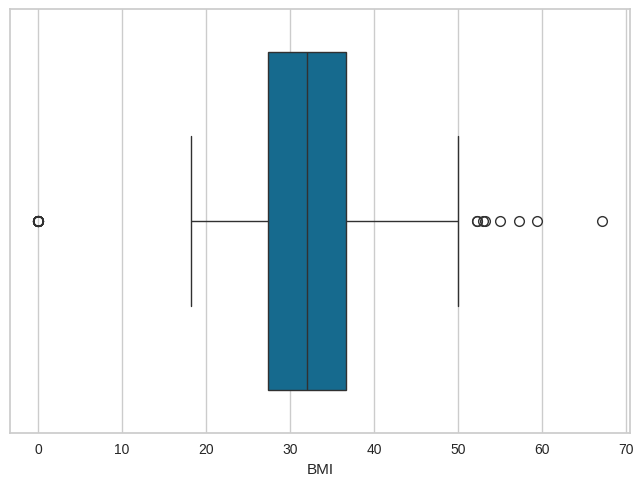

In [23]:
# BMI
sns.boxplot(x='BMI',data=data)

On va remplacer les valeurs abérentes par Q1-1.5*IQR et Q3+1.5IQR

In [24]:
# Calcul de la borne supérieure
lower_bmi, upper_bmi = limit_outlier(data,'BMI')
# remplacement
data.loc[data['BMI'] < lower_bmi,'BMI' ] = lower_bmi
data.loc[data['BMI'] > upper_bmi,'BMI' ] = upper_bmi
data[(data['BMI'] < lower_bmi) & (data['BMI'] > upper_bp)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: xlabel='DiabetesPedigreeFunction'>

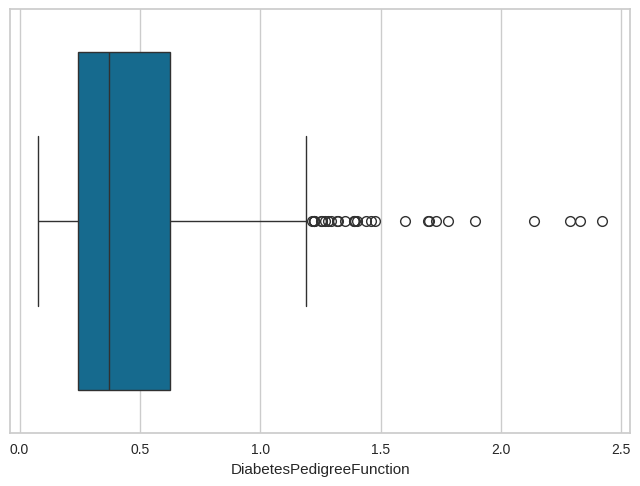

In [25]:
# DiabetesPedigreeFunction
sns.boxplot(x='DiabetesPedigreeFunction',data=data)

On va remplacer les valeurs abérentes par Q3+1.5IQR

In [26]:
#calcul de la valeurs limites de valeurs abérentes
max_dg = data['DiabetesPedigreeFunction'].mean() + 3*data['DiabetesPedigreeFunction'].std()
max_dg

1.4658620871216579

In [27]:
# Calcul de la borne supérieure
lower_dg, upper_dg = limit_outlier(data,'DiabetesPedigreeFunction')
# remplacement
data.loc[data['DiabetesPedigreeFunction'] > max_dg, 'DiabetesPedigreeFunction' ] = upper_dg
data[data['DiabetesPedigreeFunction'] > max_dg]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: xlabel='Age'>

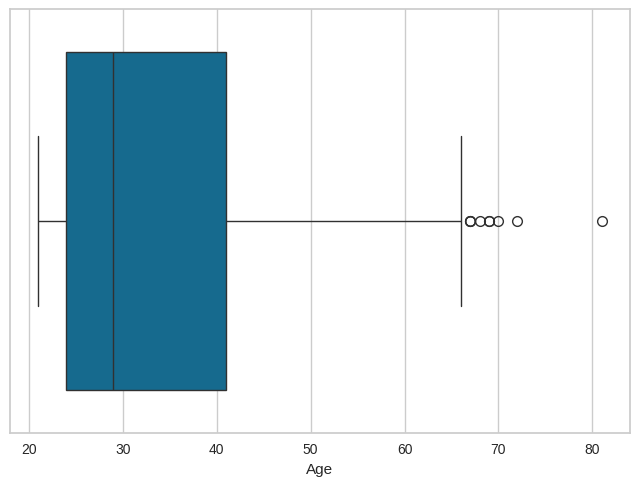

In [28]:
#Age
sns.boxplot(x='Age',data=data)

On va remplacer les valeurs abérentes par Q3+1.5IQR

In [29]:
lower_age, upper_age = limit_outlier(data,'Age')
# remplacement
data.loc[data['Age'] > 65, 'Age' ] = upper_age
data[data['Age'] > 65]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5.0,132.0,80,0,0.0,26.80,0.186,66.5,0
221,2.0,158.0,90,0,0.0,31.60,0.805,66.5,1
363,4.0,146.0,78,0,0.0,38.50,0.520,66.5,1
453,2.0,119.0,35,0,0.0,19.60,0.832,66.5,0
459,9.0,134.0,74,33,60.0,25.90,0.460,66.5,0
489,8.0,194.0,80,0,0.0,26.10,0.551,66.5,0
495,6.0,166.0,74,0,0.0,26.60,0.304,66.5,0
537,0.0,57.0,60,0,0.0,21.70,0.735,66.5,0
552,6.0,114.0,88,0,0.0,27.80,0.247,66.5,0
666,4.0,145.0,82,18,0.0,32.50,0.235,66.5,1


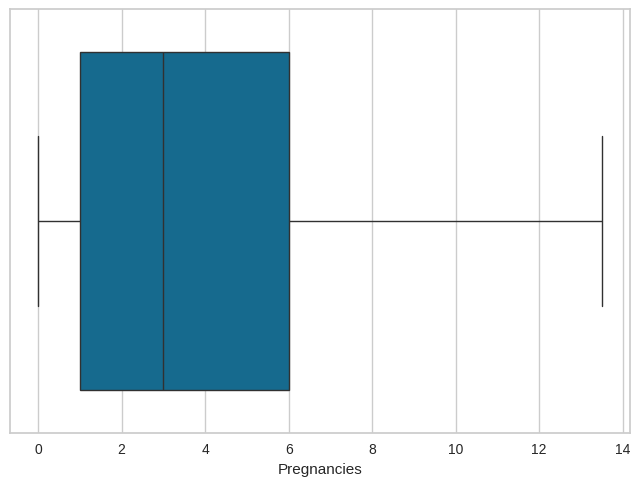

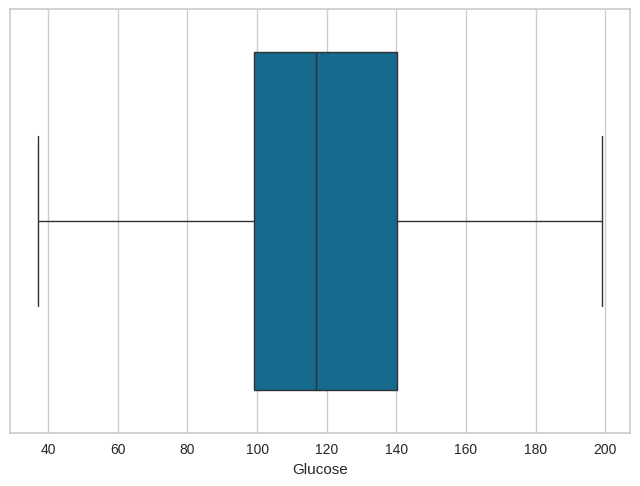

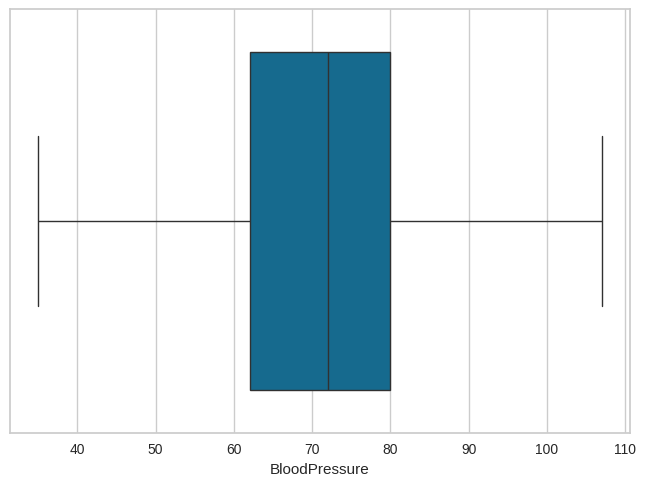

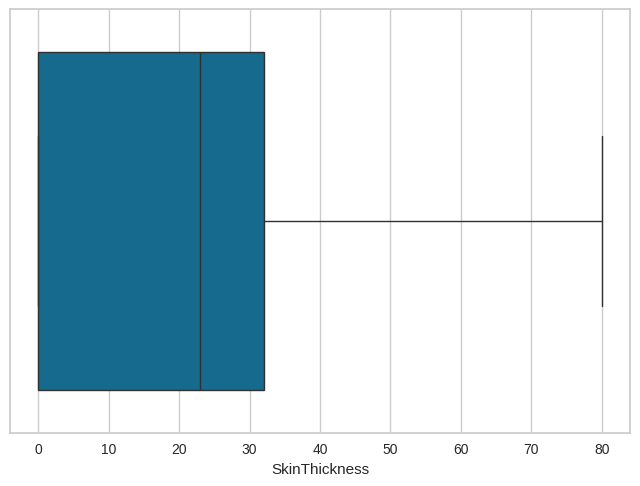

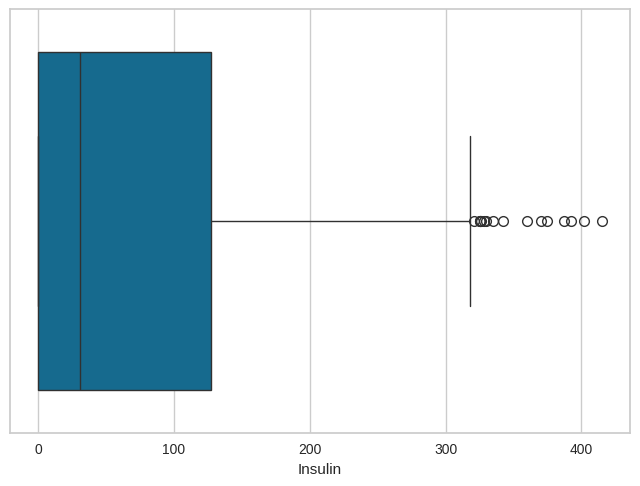

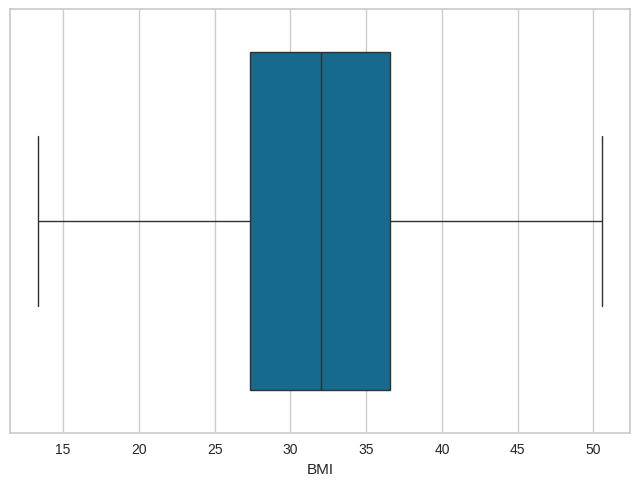

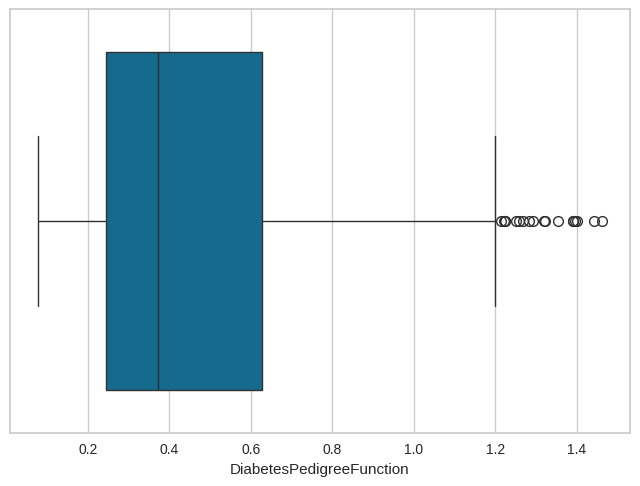

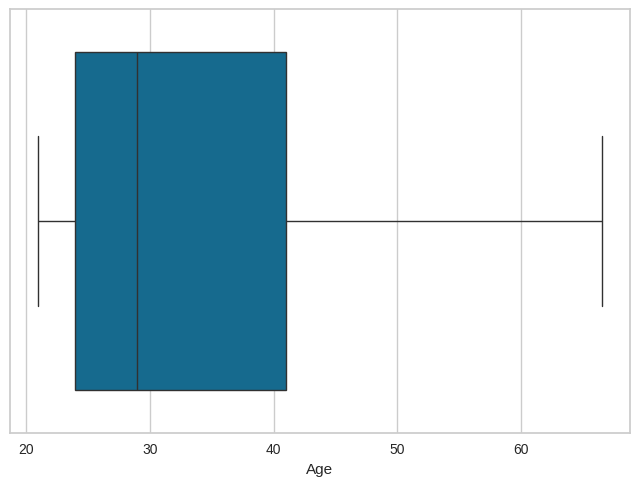

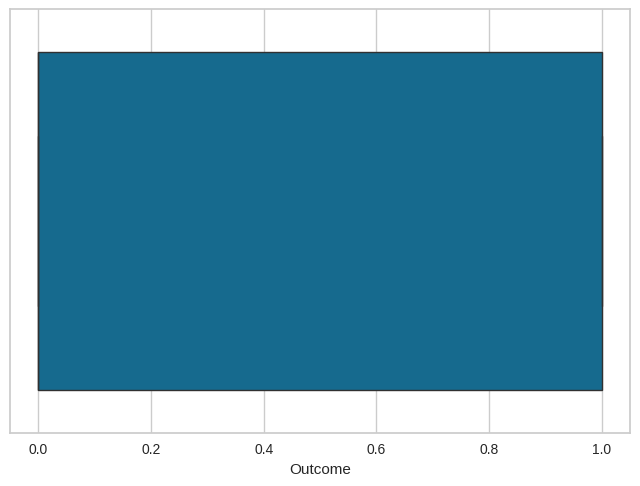

In [30]:
# Les boxplot
col1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
for i in col1:
    sns.boxplot(x = i,data=data)
    plt.show()

#### Matrice de correlation

<Axes: >

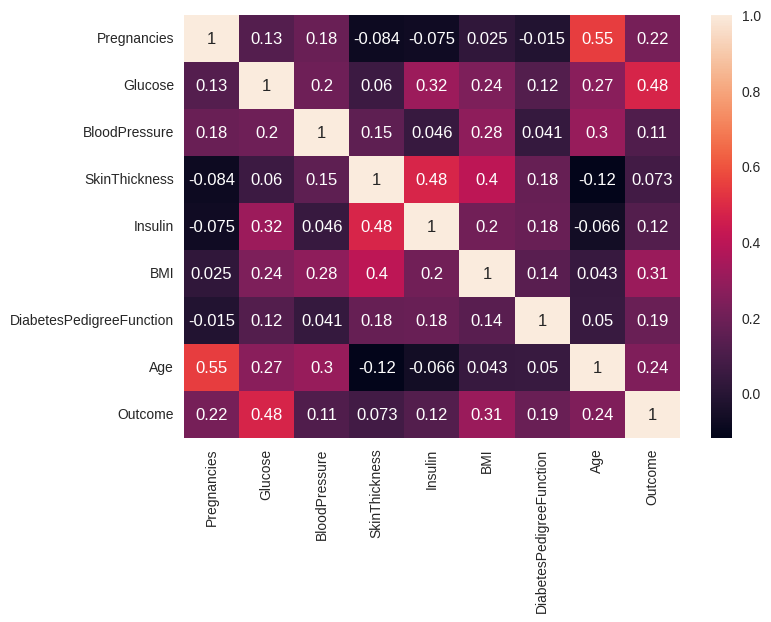

In [31]:
sns.heatmap(data[col1].corr(),annot=True)

## VISUALISATION

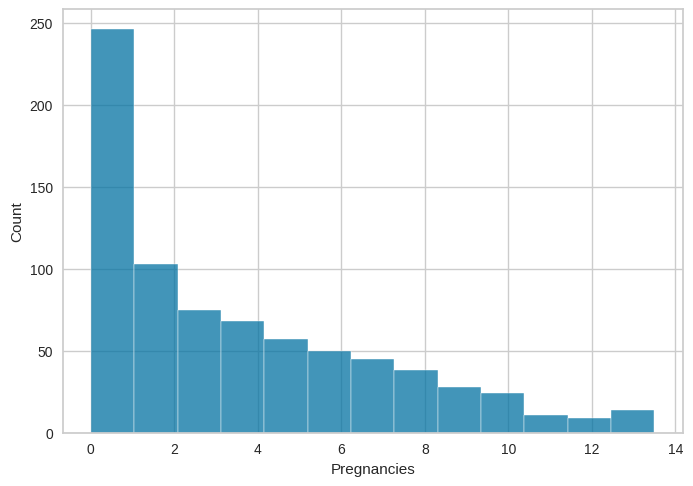

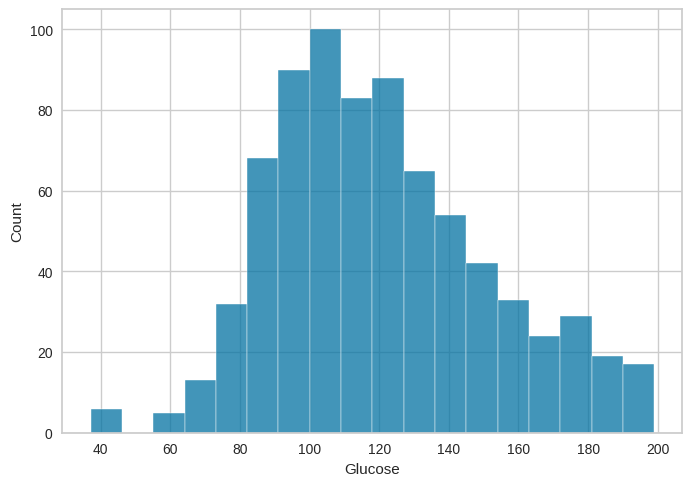

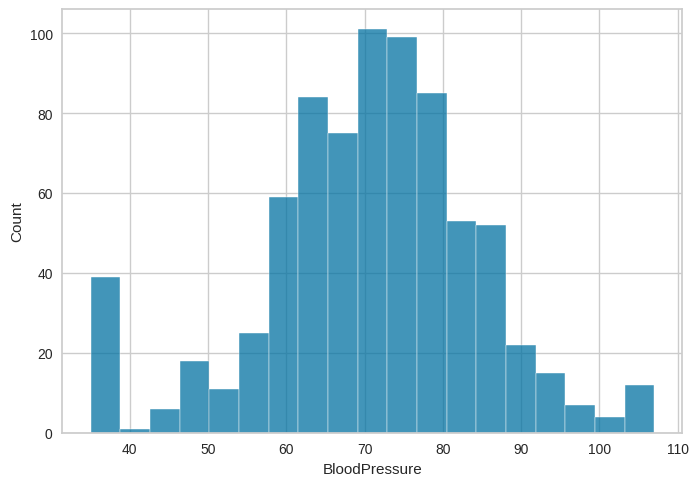

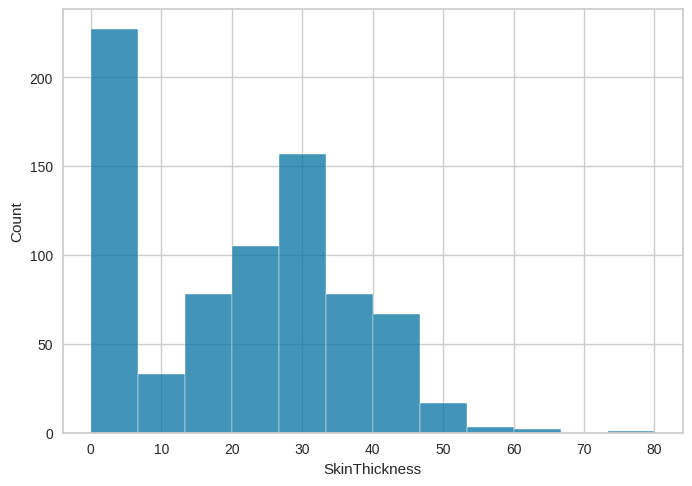

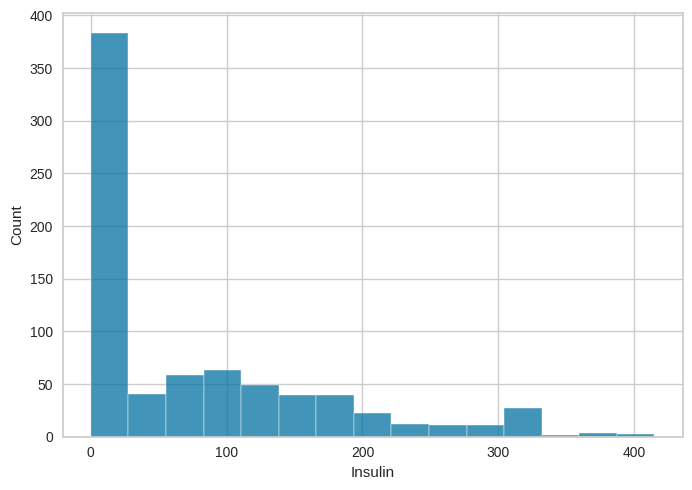

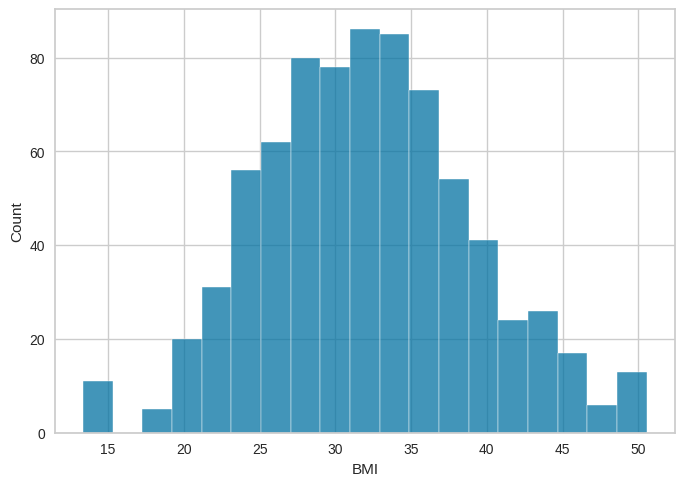

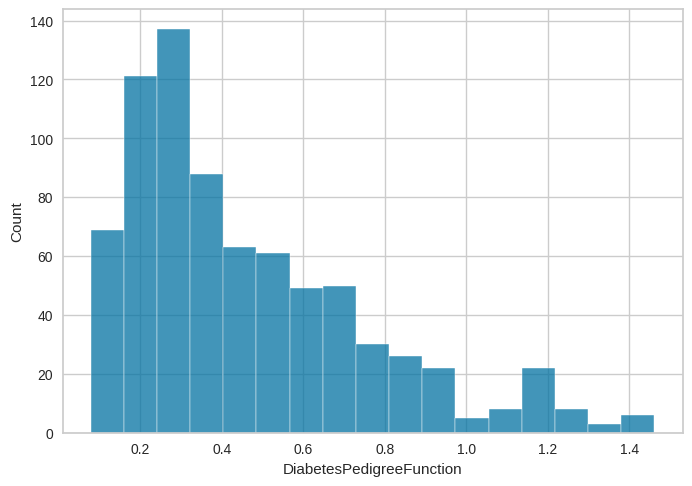

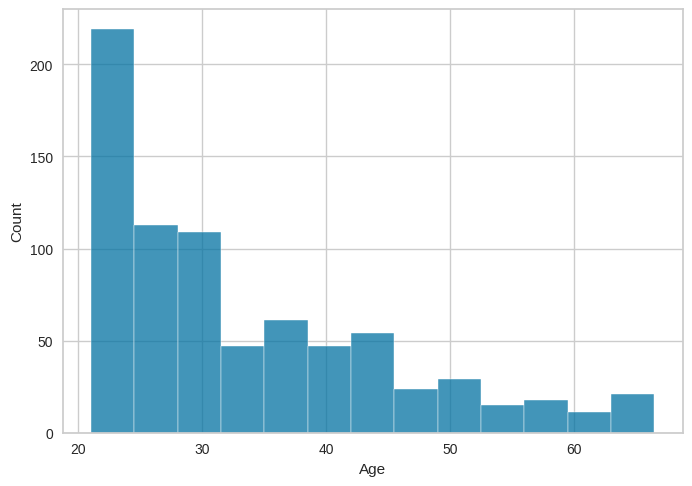

In [32]:
#Distribution des variables
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    sns.histplot(data[i])
    plt.show()

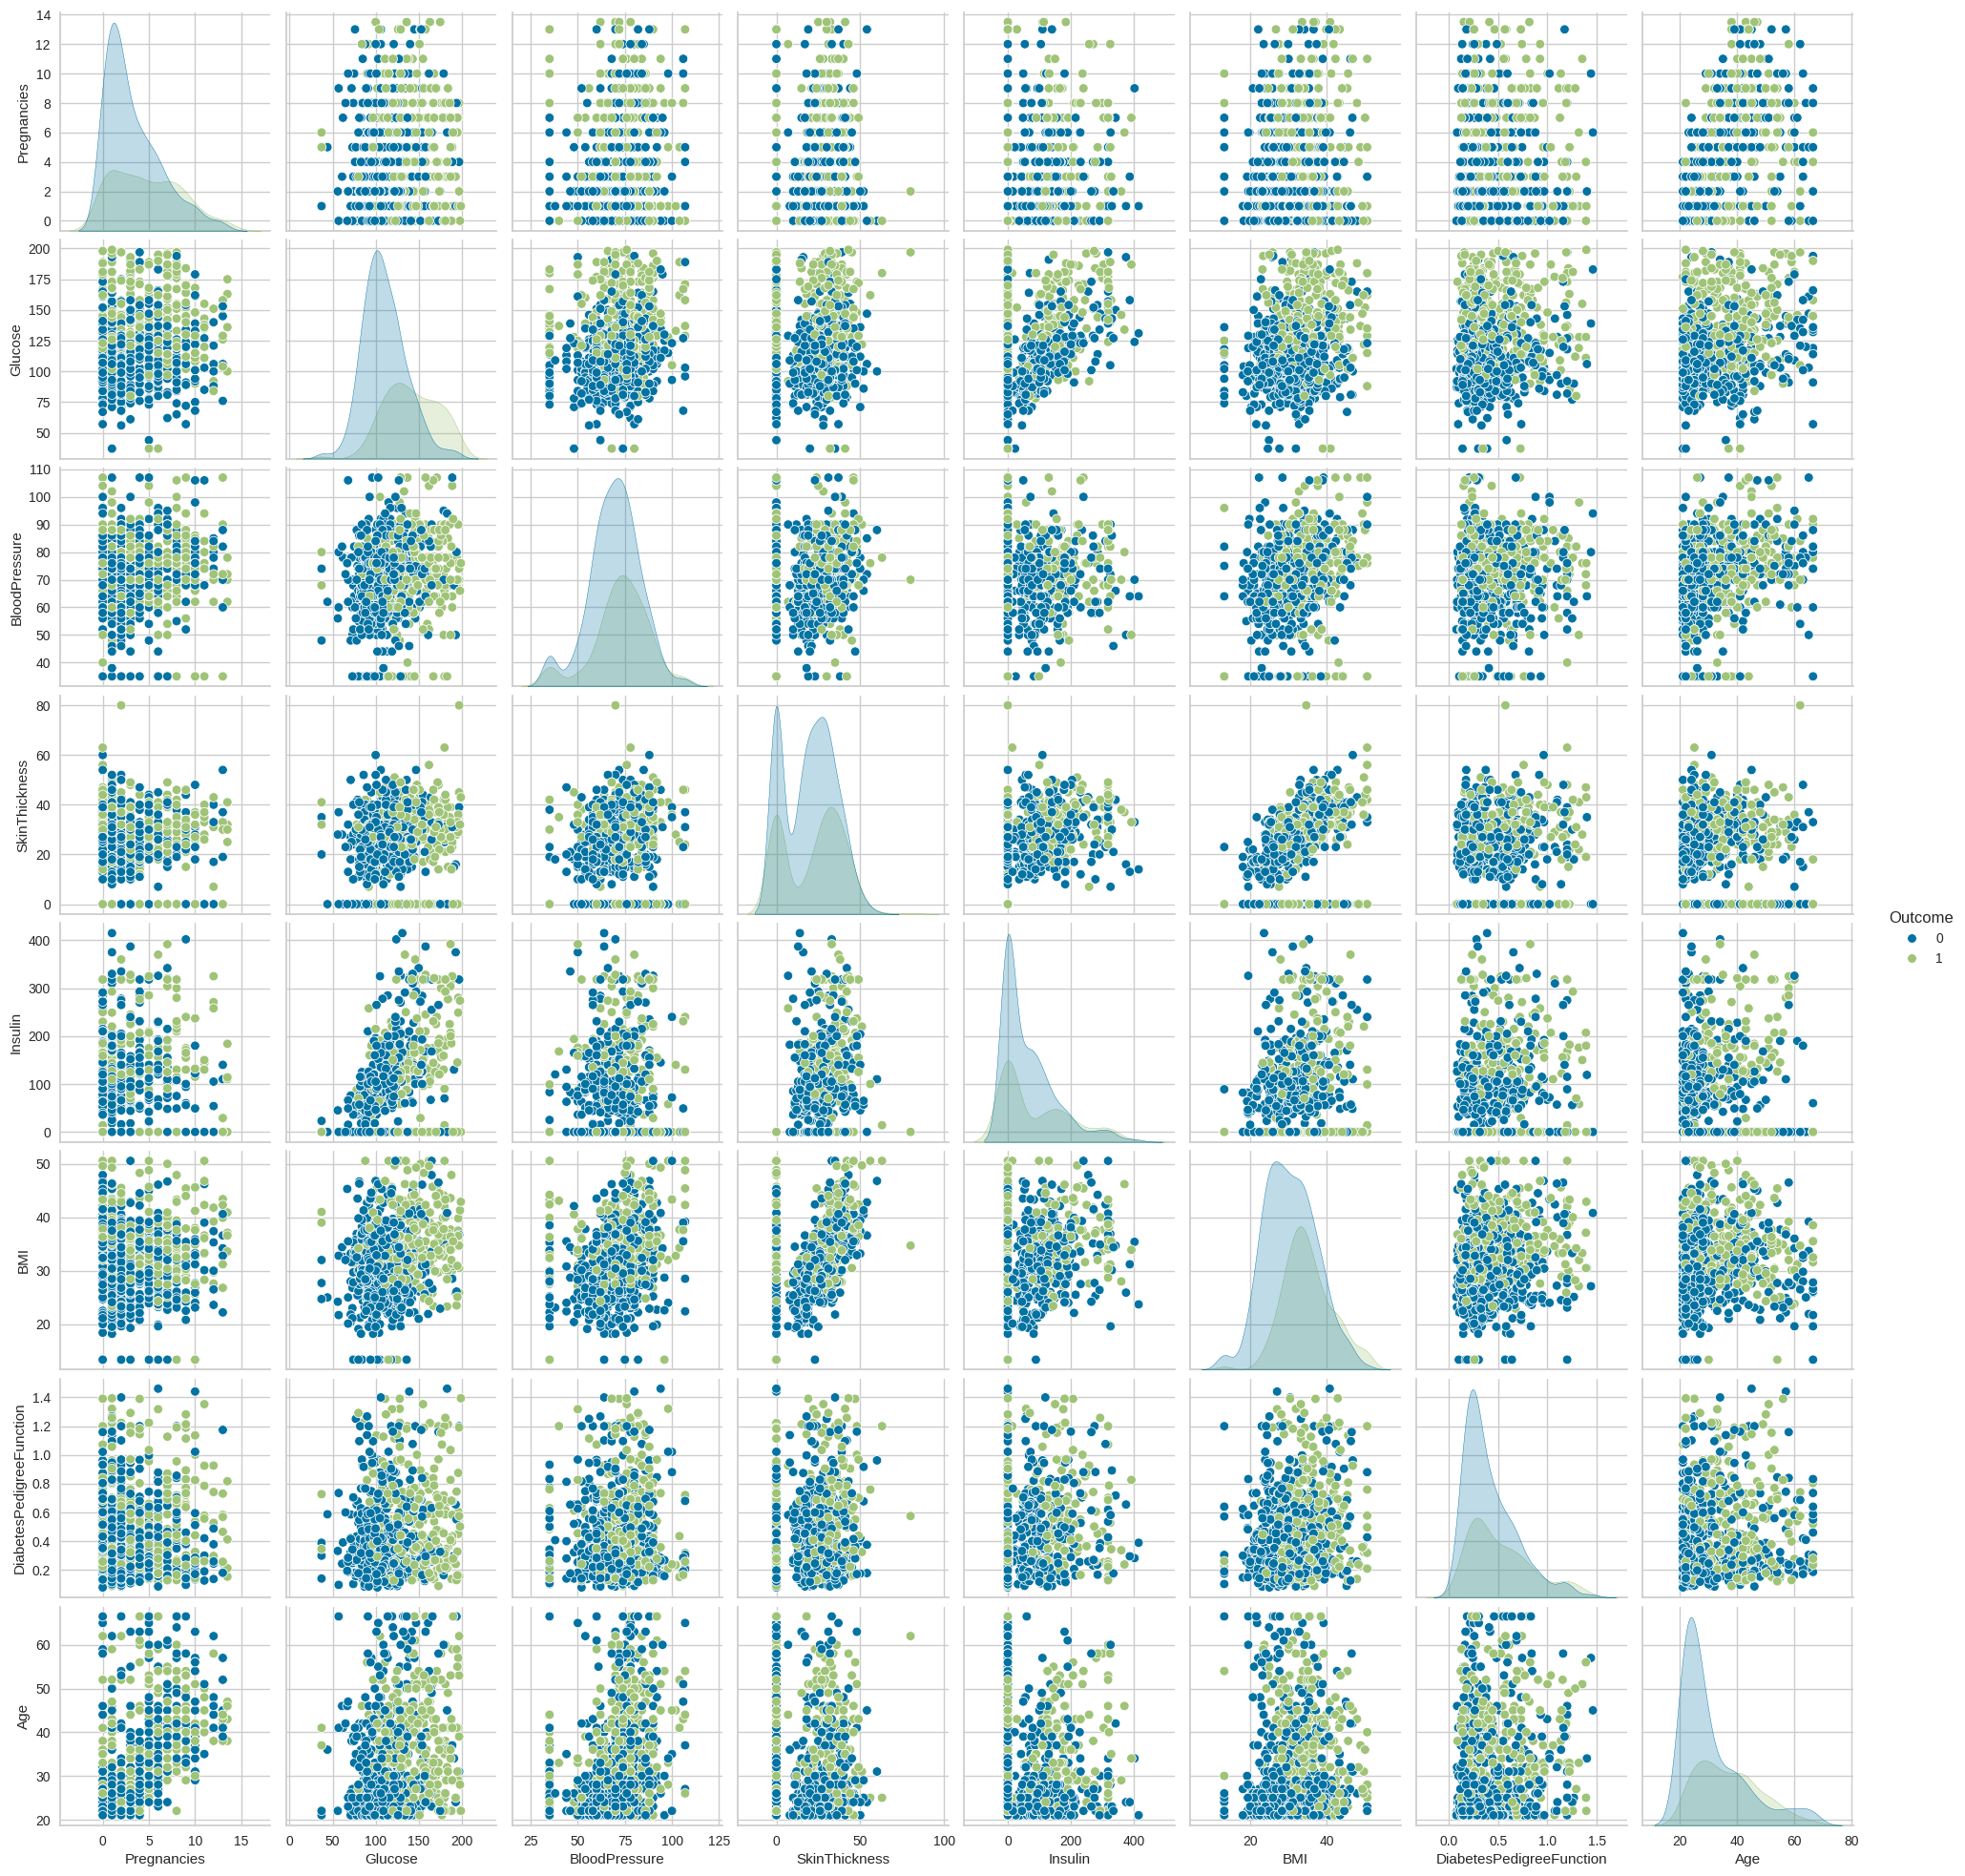

In [33]:
sns.pairplot(hue='Outcome',data=data)

#### Visualisation de la target

In [34]:
# nombre de valeurs par classe
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

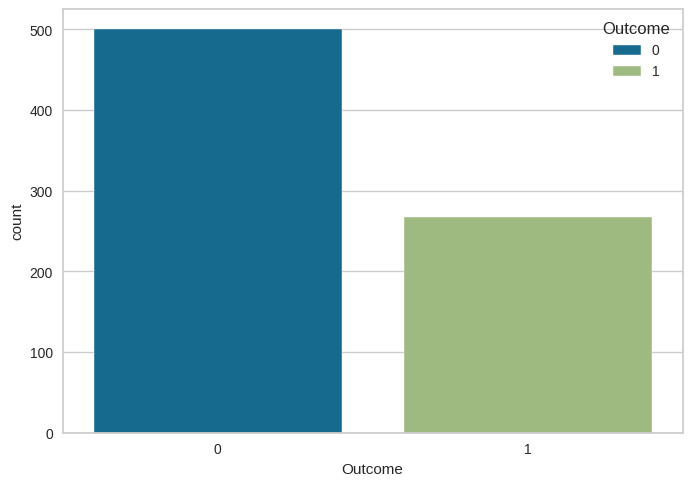

In [35]:
sns.countplot(x='Outcome',hue='Outcome',data=data)

In [36]:
from pycaret.classification import *
from imblearn.over_sampling import SMOTE

In [37]:
prep = setup(data=data,target='Outcome',session_id=123,train_size = 0.7, fix_imbalance=True, fix_imbalance_method=SMOTE())

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(931, 9)"
5,Transformed train set shape,"(700, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [38]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:53:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7427,0.7940,0.6728,0.6265,0.6468,0.4458,0.4479,0.0540
lda,Linear Discriminant Analysis,0.7353,0.8082,0.6827,0.6085,0.6414,0.4331,0.4370,0.0170
lr,Logistic Regression,0.7333,0.8052,0.6880,0.6039,0.6416,0.4312,0.4349,0.5580
catboost,CatBoost Classifier,0.7319,0.7947,0.6363,0.6128,0.6218,0.4148,0.4171,1.5960
ridge,Ridge Classifier,0.7297,0.8060,0.6614,0.6023,0.6286,0.4172,0.4200,0.0200
rf,Random Forest Classifier,0.7262,0.7859,0.6193,0.6065,0.6106,0.3998,0.4019,0.1000
nb,Naive Bayes,0.7224,0.8032,0.6611,0.5924,0.6214,0.4039,0.4087,0.0160
qda,Quadratic Discriminant Analysis,0.7224,0.7955,0.6614,0.5955,0.6237,0.4054,0.4094,0.0170
gbc,Gradient Boosting Classifier,0.7187,0.7826,0.6518,0.5879,0.6158,0.3954,0.3988,0.0840
et,Extra Trees Classifier,0.7169,0.7814,0.5716,0.6013,0.5832,0.3698,0.3720,0.0870


In [39]:
model = create_model('ridge')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:03:43
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8977,0.7895,0.7143,0.7500,0.6035,0.6054
1,0.7037,0.7850,0.6842,0.5652,0.6190,0.3802,0.3848
2,0.8889,0.9278,0.8421,0.8421,0.8421,0.7564,0.7564
3,0.7037,0.7699,0.6842,0.5652,0.6190,0.3802,0.3848
4,0.8519,0.9083,0.7895,0.7895,0.7895,0.6752,0.6752
5,0.6667,0.6571,0.4737,0.5294,0.5000,0.2512,0.2520
6,0.7222,0.8015,0.7368,0.5833,0.6512,0.4255,0.4336
7,0.7170,0.8683,0.5000,0.6000,0.5455,0.3424,0.3454
8,0.6415,0.7048,0.5000,0.4737,0.4865,0.2114,0.2116


In [40]:
tuned_model = tune_model(model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:03:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.9023,0.7895,0.6000,0.6818,0.4698,0.4825
1,0.7222,0.8090,0.6842,0.5909,0.6341,0.4122,0.4151
2,0.8333,0.9263,0.8947,0.7083,0.7907,0.6553,0.6677
3,0.7407,0.7955,0.7368,0.6087,0.6667,0.4577,0.4633
4,0.8704,0.9083,0.8421,0.8000,0.8205,0.7192,0.7197
5,0.6481,0.6707,0.4737,0.5000,0.4865,0.2192,0.2194
6,0.7222,0.8015,0.7368,0.5833,0.6512,0.4255,0.4336
7,0.7170,0.8492,0.6111,0.5789,0.5946,0.3774,0.3778
8,0.6226,0.6921,0.5556,0.4545,0.5000,0.2018,0.2044


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [42]:
# Nouvelles données
new_data = pd.read_csv("diabetes.csv")

# Prédictions
predictions = predict_proba(model, data=new_data)

TypeError: 'property' object is not callable

In [42]:
predictions.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label
0,6,148,72,35,0,33.599998,0.627,50,1,1
1,1,85,66,29,0,26.600000,0.351,31,0,0
2,8,183,64,0,0,23.299999,0.672,32,1,1
3,1,89,66,23,94,28.100000,0.167,21,0,0
4,0,137,40,35,168,43.099998,2.288,33,1,1
5,5,116,74,0,0,25.600000,0.201,30,0,0
6,3,78,50,32,88,31.000000,0.248,26,1,0
7,10,115,0,0,0,35.299999,0.134,29,0,1
8,2,197,70,45,543,30.500000,0.158,53,1,1
9,8,125,96,0,0,0.000000,0.232,54,1,0


In [43]:
save_model(tuned_model, 'diabetes')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 (...
          